In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv.

In [2]:
data = pd.read_csv("data_linear.txt")

In [3]:
data.tail()

,Diện tích,Giá
25,90.3448,1374.92
26,92.7586,1410.16
27,95.1724,1469.69
28,97.5862,1478.54
29,100.0000,1515.28


Tìm w theo công thức:
    $ w = (x^Tx)^{-1}x^Tt $


In [4]:
class LinearModel:
    def __init__(self, data, x, y):
        self.data = data
        a = np.array([1]*len(data)) # array of 1s
        self.x = np.array([a,  data[x]]).transpose()
        self.t = y
        xtx = (self.x).transpose().dot(self.x)
        self.model = np.linalg.inv(xtx).dot(self.x.transpose()).dot(data[y])
    
    def __repr__(self) -> str:
        return f"{self.model[0]:.3f} + {self.model[1]:.3f}x" 

    def predict(self, x):
        return self.model[0] + self.model[1] * x
    
    def plot(self, x, y):
        values = np.linspace(self.data[x].min(), self.data[x].max(), 2)
        plt.scatter(self.data[x], self.data[y])
        plt.xlabel = "mét vuông"
        plt.ylabel = "giá"
        plt.plot(values, self.model[0] + self.model[1] * values, color = "red")
        plt.show()

In [5]:
solution = LinearModel(data, "Diện tích", "Giá")

model: $ y = w_0 + w_1x $

In [6]:
print(solution)

-7.064 + 15.211x


Vẽ model dự đoán (đường thẳng) và dữ liệu (point - scatter)

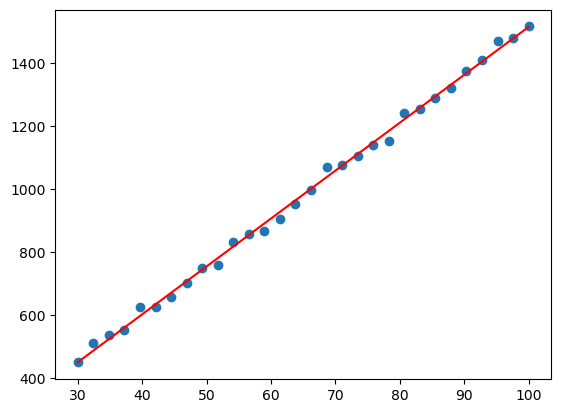

In [7]:

solution.plot("Diện tích", "Giá")


Dự đoán giá các căn nhà có diện tích 50, 100, 150.

In [8]:
for i in [50, 100, 150]:
    print(f"price prediction for {i} m2 house: {solution.predict(i)}")

price prediction for 50 m2 house: 753.4902713382776
price prediction for 100 m2 house: 1514.0448113217985
price prediction for 150 m2 house: 2274.59935130532


### 3. Viết code numpy, tìm model linear regression cho bai toán dữ đoán giá nhà, dataset: https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [9]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [10]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [11]:
class LinearModelBoston:
    def __init__(self, data):
        temp = data[data.columns[:-1]]
        temp["I"] = 1
        temp = temp[["I", "CRIM",	"ZN",	"INDUS",	"CHAS",	"NOX",	"RM",	"AGE",	"DIS",	"RAD",	"TAX",	'PTRATIO',	"B",	"LSTAT"]]
        x = temp.to_numpy()
        y = data["MEDV"]
        xtx = x.transpose().dot(x)
        self.model = np.linalg.inv(xtx).dot(x.transpose()).dot(y)

    def __repr__(self) -> str:
        res = f"{self.model[0]:.2f}"
        i = 1
        while i < len(self.model):
            res += f" + {self.model[i]:.2f}*x{i}"
            i += 1
        return res
    
    def predict(self, arr):
        res = 0
        arr = np.append([1], arr)
        return arr.dot(self.model)
    

In [12]:
solution = LinearModelBoston(boston)
print(solution)

36.46 + -0.11*x1 + 0.05*x2 + 0.02*x3 + 2.69*x4 + -17.77*x5 + 3.81*x6 + 0.00*x7 + -1.48*x8 + 0.31*x9 + -0.01*x10 + -0.95*x11 + 0.01*x12 + -0.52*x13


In [13]:
solution.predict([0.05, 0, 2, 0, 0.3,
       9, 67, 4, 3, 6,
       1.6, 3, 10])

53.69821680520947

In [14]:
print(solution.model)

[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]
